In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 20

import inspect

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format="retina"  # enable retina display 

# 1 Data Visualization with Matplotlib

[Matplotlib](https://matplotlib.org/) is a data visualization library built on NumPy arrays, and designed to work with the broader SciPy stack.

<img src="https://drive.google.com/uc?export=download&id=1Lj3H-j_nGLPsBqi-Jq4IgdUUk78WxQon"  width="300px"></img>

Matplotlib was originally written as a Python alternative for MATLAB users, exposing a MATLAB-style interface that is fast and convenient for simple plots.

It also provides an ***object-oriented*** interface for more complicated situations when we want more control over our figure.

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt  # The plt interface is what we will use most often



---

## 1.1 MATLAB-style Interface

`matplotlib.pyplot` provides a MATLAB-style Interface to create components to achieve the desired plot:

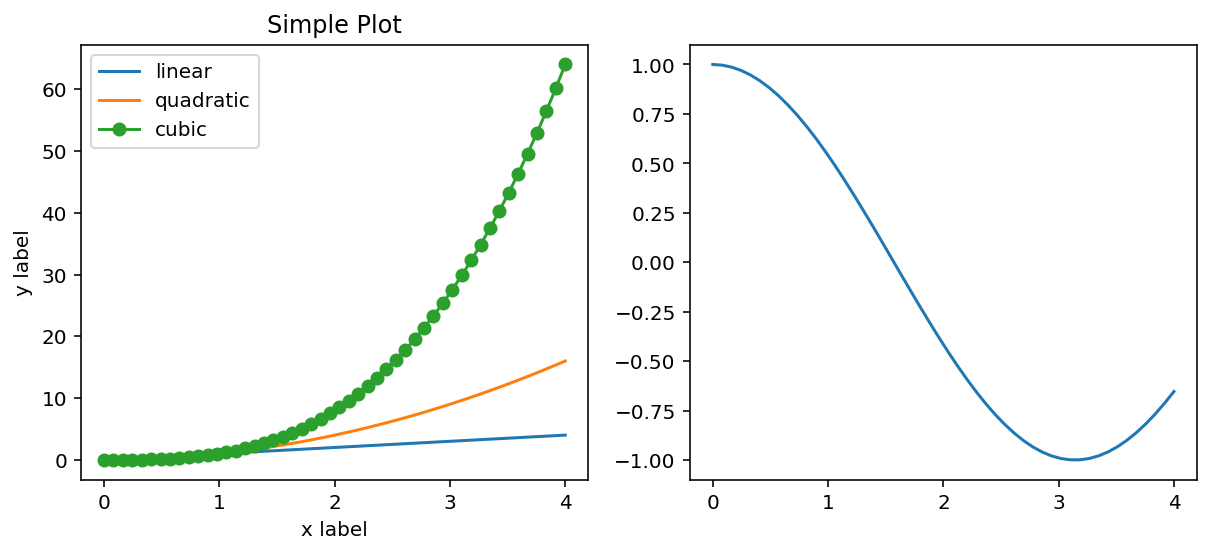

In [0]:
# create a plot figure
plt.figure(figsize=(10, 4))          

# create the first panel or Axes instance 
plt.subplot(1, 2, 1)                   # (rows, columns, panel number)

x = np.linspace(0, 4, 50)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, marker='o', label='cubic')
plt.xlabel('x label'); plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

# create the second panel and set current axes
plt.subplot(1, 2, 2)
plt.plot(x, np.cos(x))
plt.show()

<div class="alert alert-info">When plotting from a script or a Python interactive prompt, plt.show() must be provided in the very end to dispay the plot. </div>

This interface is ***stateful***:

- It keeps track of the "***current***" or "***active***" plot.
- Subsequent calls to [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) re-use it, each adding another line;

- Setting the title, legend, and axis labels also automatically use the current plot.


While the stateful interface is fast and convenient for simple plots, it is easy to run into problems.


---

## 1.2 Parts of a Plot

 
A matplotlib plot can be understood from an object-oriented perspective:
 
<img src="https://drive.google.com/uc?export=download&id=1fOcU6bDPAfgXBsbcNX8pu5NH5J9BO121"  width="350px" style="float: left; margin-bottom: 1.5em; margin-top: 1.5em; margin-right: 10%;"/></img>
 

<br>
 

 Plots reside within a [`Figure`](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html) instance, which can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels.
 

An [`Axes`](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes) is a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization. 

 

Everything else is an [`Artist`](https://matplotlib.org/api/artist_api.html), including `Text` objects, `Line2D` objects, collection objects, `Patch` objects, ... . 


Most `Artist` are tied to an `Axes`. When the figure is rendered, all of the artists are drawn to the canvas. 

 
<br>





---

## 1.3 Object-Oriented Interface


Rather than depending on some notion of an "***active***" plot, the plotting functions are methods of explicit `Figure` and `Axes` objects.




(<Figure size 720x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B8B0C2748>,
       dtype=object))

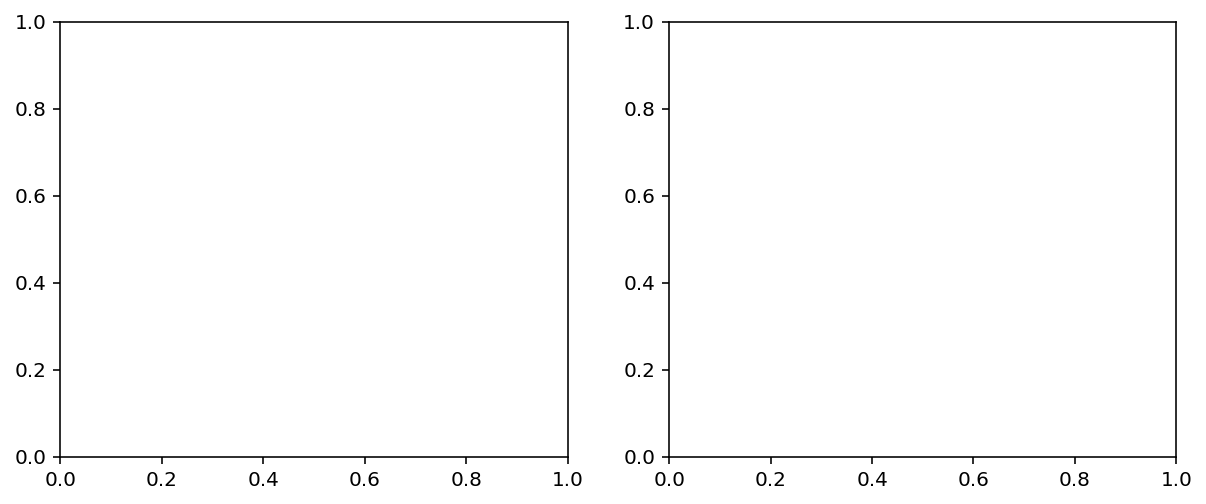

In [0]:
# First create a grid of plots, returning the Figure object and an array of its child Axes objects all at once
plt.subplots(1, 2, figsize=(10, 4))

In [0]:
temp

,x,y
0,0.000000,0.000000
1,0.081633,0.006664
2,0.163265,0.026656
3,0.244898,0.059975
4,0.326531,0.106622
...,...,...
45,3.673469,13.494377
46,3.755102,14.100791
47,3.836735,14.720533
48,3.918367,15.353603


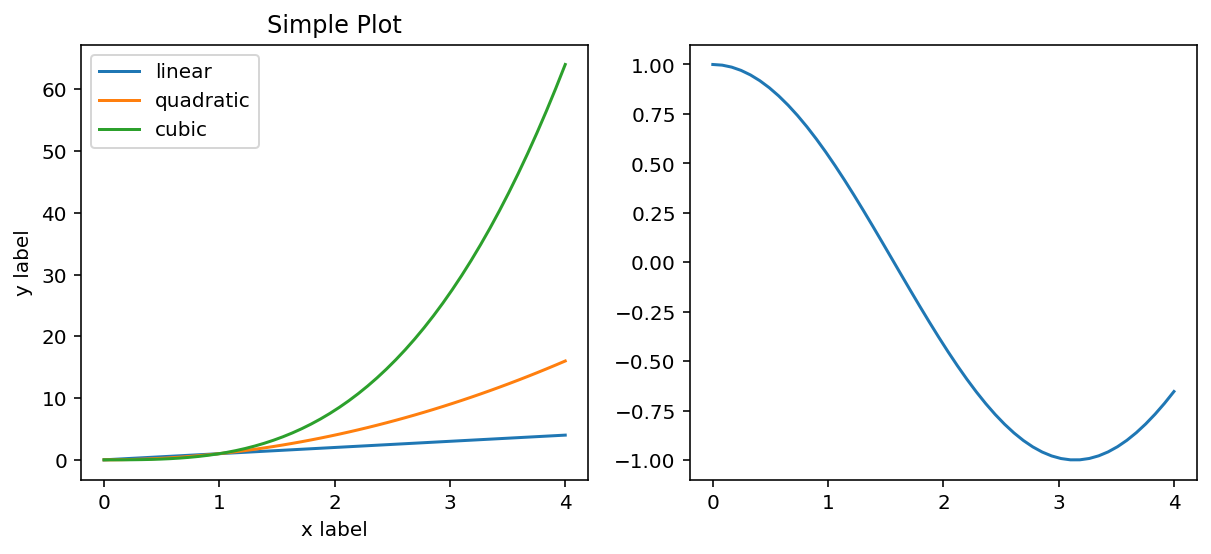

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Call plot() method on the appropriate object
 
ax[0].plot(x, x, label='linear')
ax[0].plot(x, x**2, label='quadratic')
ax[0].plot(x, x**3, label='cubic')
ax[1].plot(x, np.cos(x))

ax[0].set(xlabel='x label', ylabel='y label', title="Simple Plot") 
ax[0].legend()
plt.show()


## 1.4 Specialized Plots 


There are many specialized plots we can create, such as barplots, histograms, scatter plots, and many more. 

We will actually create most of these plots using seaborn. But here are a few examples:



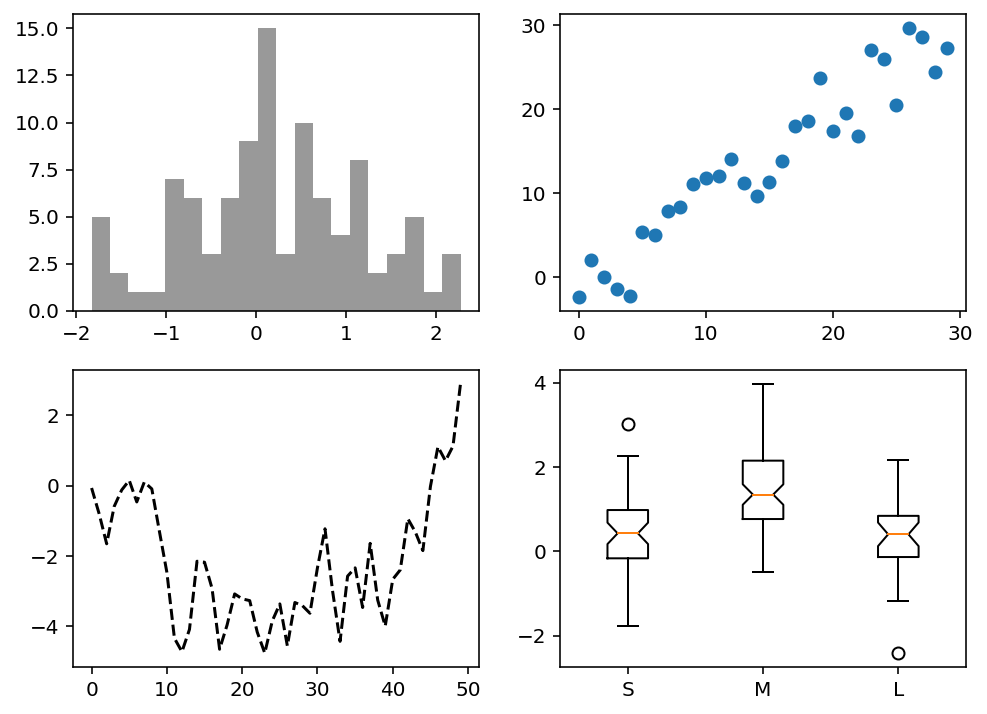

In [0]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6))

ax[0, 0].hist(np.random.normal(size=100), bins=20, color='k', alpha=0.4)
ax[0, 1].scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
ax[1, 0].plot(np.random.normal(size=50).cumsum(), 'k--')
ax[1, 1].boxplot([np.random.normal(0.5, size=50), np.random.normal(1.5, size=80), np.random.normal(0.3, size=30)], 
                 labels=['S', 'M', 'L'], notch=True)
plt.show()


---

## 1.5 Styling a Plot



### 1.5.1 Colors, Markers, and Line Styles

Both `Axes.plot()` and `pyplot.plot()` can optionally take a *format string* consisting string abbreviations indicating color, marker, and line style:



<pre>fmt = '[color][marker][line]'  <span style="font-style:italic ;"># Each of them is optional.</span></pre>

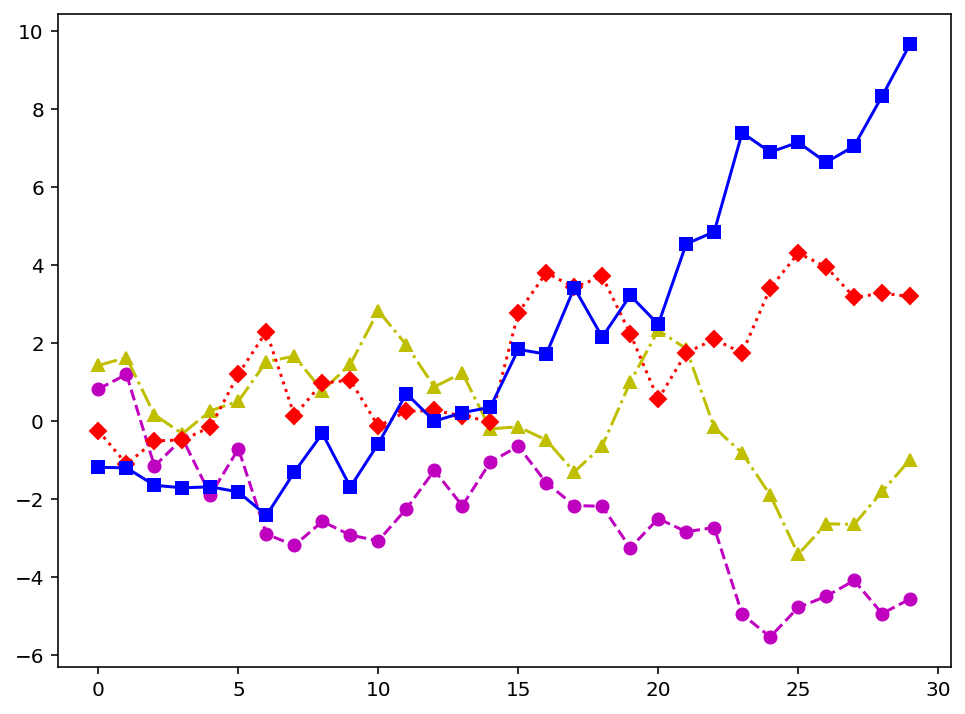

In [0]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(np.random.randn(30).cumsum(), 'mo--')  # magenta circle markers connected by a dashed line
ax.plot(np.random.randn(30).cumsum(), 'y^-.')  # yellow triangle-up markers connected by a dash-dot line
ax.plot(np.random.randn(30).cumsum(), 'rD:')   # red diamond markers connected by a dotted line
ax.plot(np.random.randn(30).cumsum(), 'bs-')   # blue squre markers connected by a solid line
plt.show()

<div class="alert alert-info">More details on format strings can be found in the format strings section on this <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html">page</a>.</div>
            
            
We can also use [`Line2D`](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html) properties as keyword arguments (having higher precedence over `fmt`; can be mixed with `fmt`) for more control on the appearance:


In [0]:
inspect.signature(mpl.axes.Axes.plot)

<Signature (self, *args, scalex=True, scaley=True, data=None, **kwargs)>

In [0]:
inspect.signature(mpl.lines.Line2D)

<Signature (xdata, ydata, linewidth=None, linestyle=None, color=None, marker=None, markersize=None, markeredgewidth=None, markeredgecolor=None, markerfacecolor=None, markerfacecoloralt='none', fillstyle=None, antialiased=None, dash_capstyle=None, solid_capstyle=None, dash_joinstyle=None, solid_joinstyle=None, pickradius=5, drawstyle=None, markevery=None, **kwargs)>

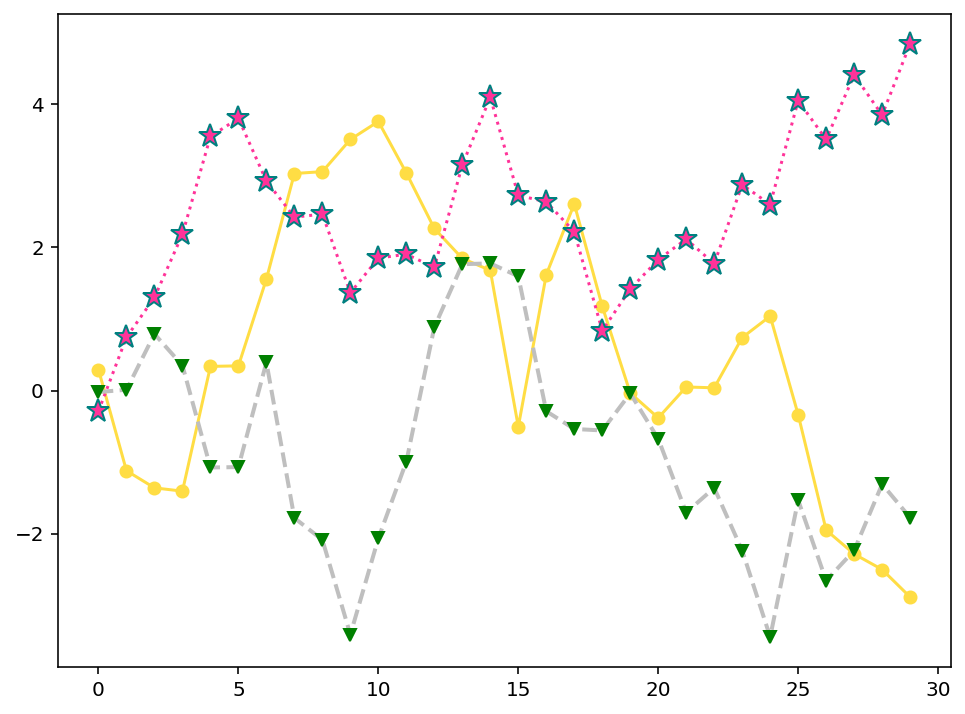

In [0]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(np.random.randn(30).cumsum(), linestyle='solid', color='#FFDD44', marker='o')  # Hex code for RGB channels
ax.plot(np.random.randn(30).cumsum(), linestyle=':', color=(1.0, 0.2, 0.6), marker='*', 
        markeredgecolor='Teal', markersize=12)      # RGB tuple values between 0 and 1 and all HTML color names supported
ax.plot(np.random.randn(30).cumsum(), color='0.75', markerfacecolor='green', markeredgecolor='green',
        marker='v', linestyle='dashed', linewidth=2, markersize=6)  # grayscale between 0 and 1
plt.show()

<div class="alert alert-info">Here are the full set of <a herf="https://matplotlib.org/3.1.1/api/colors_api.html">colors, <a herf="https://matplotlib.org/api/markers_api.html">markers</a>, <a herf="https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle">linestyles</a> supported by matplotlib.</div>



---

### 1.5.2 Axis Ticks, Tick Labels, and Ranges

The `Axes` instance methods [`set_xticks()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xticks.html) ([`set_yticks()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_yticks.html)) and [`set_xticklabels`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html) ([`set_yticklabels()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_yticklabels.html)) can be used to change the X (Y) axis ticks and their labels, while `set_xlim()` (`set_ylim()`) adjusts axis limits:

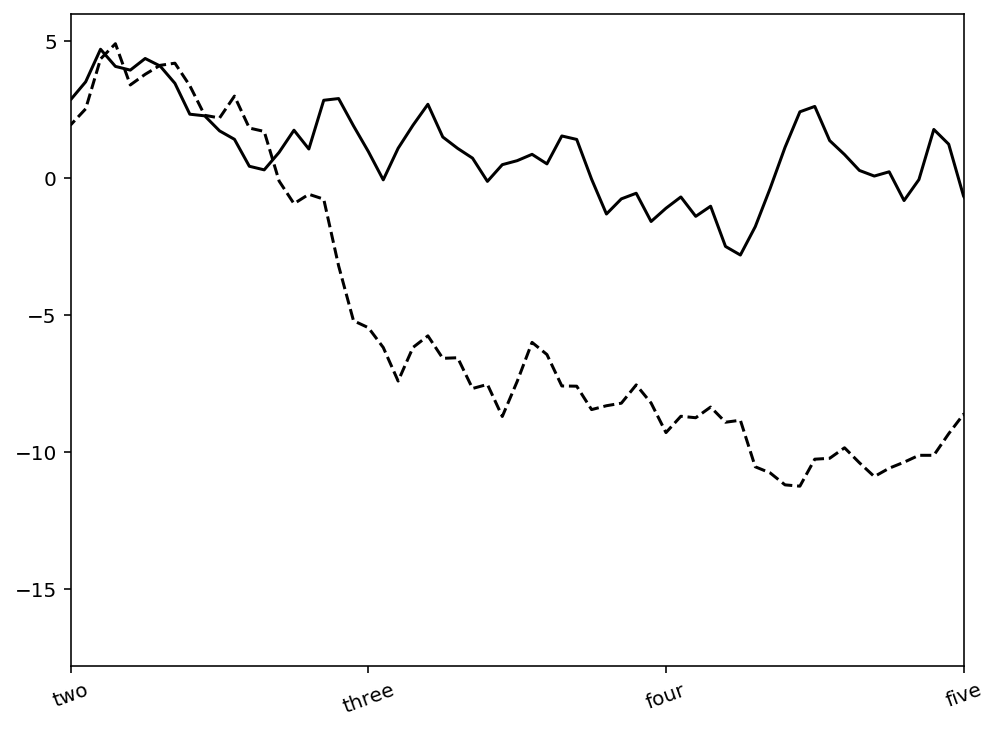

In [0]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(np.random.randn(100).cumsum(), 'k', label='first')
ax.plot(np.random.randn(100).cumsum(), 'k--', label='second')
ax.set_xticks([0, 20, 40, 60, 80, 100])                         
ax.set_xticklabels(['one', 'two', 'three', 'four', 'five', 'six'], rotation=20)
ax.set_xlim([20, 80])
plt.show()

<div class="alert alert-info"><a href="https://matplotlib.org/api/axes_api.html">Axes.tick_params</a> can change the appearance of ticks, tick labels, and gridlines.</div>



---

### 1.5.3 Axis Labels, Titles and Legends



The `Axes` instance methods
[`set_xlabel()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html), [`set_ylabel()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html), and [`set_title()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_title.html) create and return a [`Text`](https://matplotlib.org/api/text_api.html#matplotlib.text.Text) object, which can be configured with a variety of font and other properties.

 
 


The [`legend()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.legend.html) method adds a [`Legend`](https://matplotlib.org/api/legend_api.html#matplotlib.legend.Legend) that only lists plot elements that have a label specified.
 


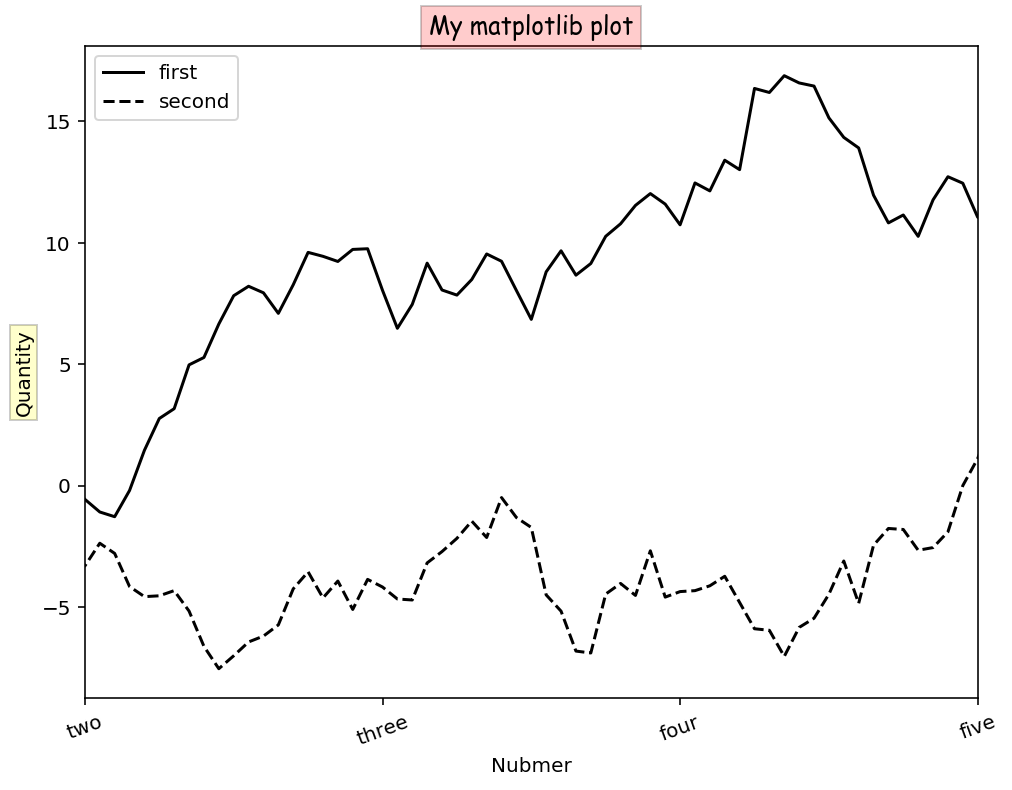

In [0]:
fig = plt.figure(figsize=[8, 6]); ax = plt.axes()
ax.plot(np.random.randn(100).cumsum(), 'k', label='first')
ax.plot(np.random.randn(100).cumsum(), 'k--', label='second')
ax.set_xticks([0, 20, 40, 60, 80, 100])
ax.set_xticklabels(['one', 'two', 'three', 'four', 'five', 'six'], rotation=20)
ax.set_xlim([20, 80])
ax.set_xlabel('Nubmer')
ax.set_ylabel('Quantity', bbox=dict(facecolor='yellow', pad=2, alpha=0.2))
ax.set_title('My matplotlib plot', fontfamily='fantasy', bbox=dict(facecolor='red', pad=4, alpha=0.2))
ax.legend(loc='best')
plt.show()

The `Axes` class has a `set()` method that allows batch setting of plot properties. For the prior example, we could have written:

In [0]:
ax.set(xticks=[0, 20, 40, 60, 80, 100], xticklabels=['one', 'two', 'three', 'four', 'five', 'six'], xlim=[20, 80])

---

### 1.5.4 Annotations (Optional)


A plot of the data for closing S&P 500 index prices (from Yahoo! Finance):

In [0]:
import pandas as pd
from pandas_datareader import data as pdr
apple = pdr.DataReader('^GSPC', 'yahoo', start='4/30/2007', end='4/30/2009')

In [0]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-04-30,1497.160034,1482.290039,1494.069946,1482.369995,3093420000,1482.369995
2007-05-01,1487.270020,1476.699951,1482.369995,1486.300049,3400350000,1486.300049
2007-05-02,1499.099976,1486.130005,1486.130005,1495.920044,3189800000,1495.920044
2007-05-03,1503.339966,1495.560059,1495.560059,1502.390015,3007970000,1502.390015
2007-05-04,1510.339966,1501.800049,1502.349976,1505.619995,2761930000,1505.619995


In [0]:
apple['Close'].head(10)

Date
2007-04-30    1482.369995
2007-05-01    1486.300049
2007-05-02    1495.920044
2007-05-03    1502.390015
2007-05-04    1505.619995
2007-05-07    1509.479980
2007-05-08    1507.719971
2007-05-09    1512.579956
2007-05-10    1491.469971
2007-05-11    1505.849976
Name: Close, dtype: float64

In [0]:
apple['Close'].tail(10)

Date
2009-04-17    869.599976
2009-04-20    832.390015
2009-04-21    850.080017
2009-04-22    843.549988
2009-04-23    851.919983
2009-04-24    866.229980
2009-04-27    857.510010
2009-04-28    855.159973
2009-04-29    873.640015
2009-04-30    872.809998
Name: Close, dtype: float64

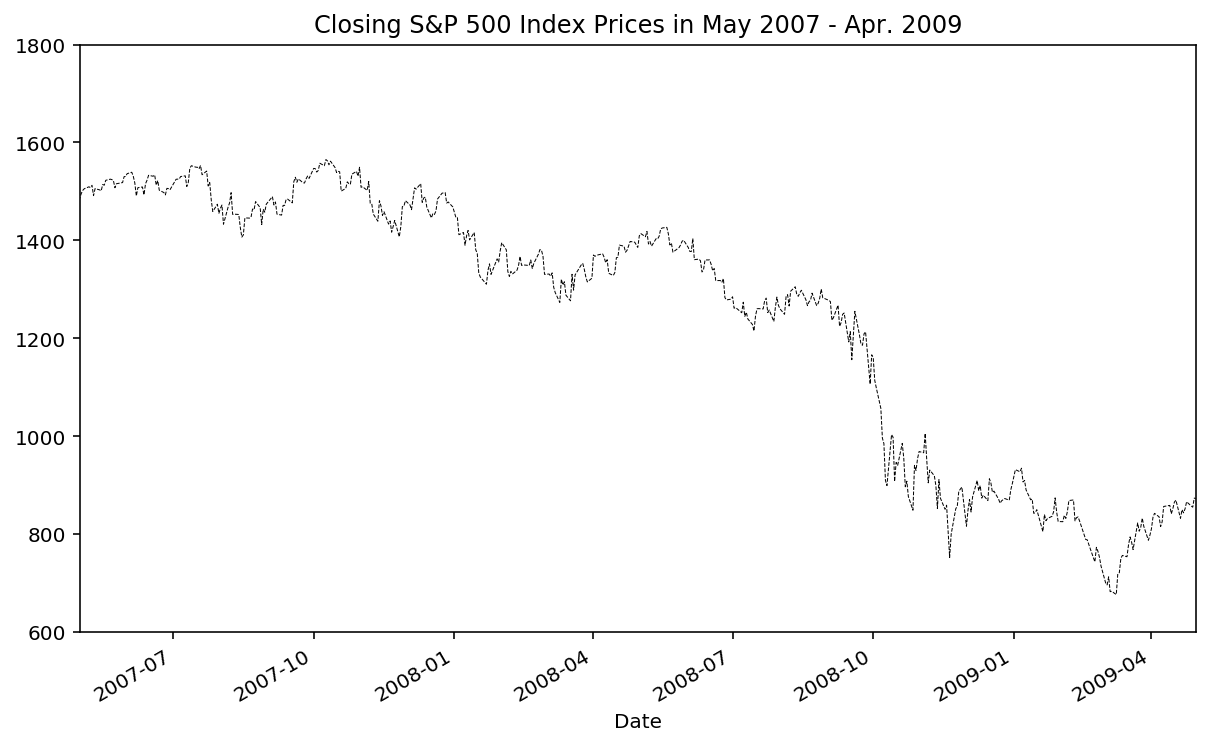

In [0]:
spx = apple['Close']
fig, ax = plt.subplots(1, 1, figsize=[10, 6])
spx.plot(ax=ax, style='k--', linewidth=0.5)
ax.set(xlim=['5/1/2007', '4/30/2009'], ylim=[600, 1800], title='Closing S&P 500 Index Prices in May 2007 - Apr. 2009')
plt.show()

We're going to annotate this plot with some of the important dates from the 2008-2009 financial crisis.

In [0]:
from datetime import datetime, timedelta
crisis_data = [(datetime(2007, 10, 11), 'Peak of bull market'), (datetime(2008, 3, 12), 'Bear Stearns Fails'), 
               (datetime(2008, 9, 15), 'Lehman Bankruptcy')]  

Annotations and text can be added using the [`text()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.text.html), [`arrow()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.arrow.html), and [`annotate()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.annotate.html) functions:

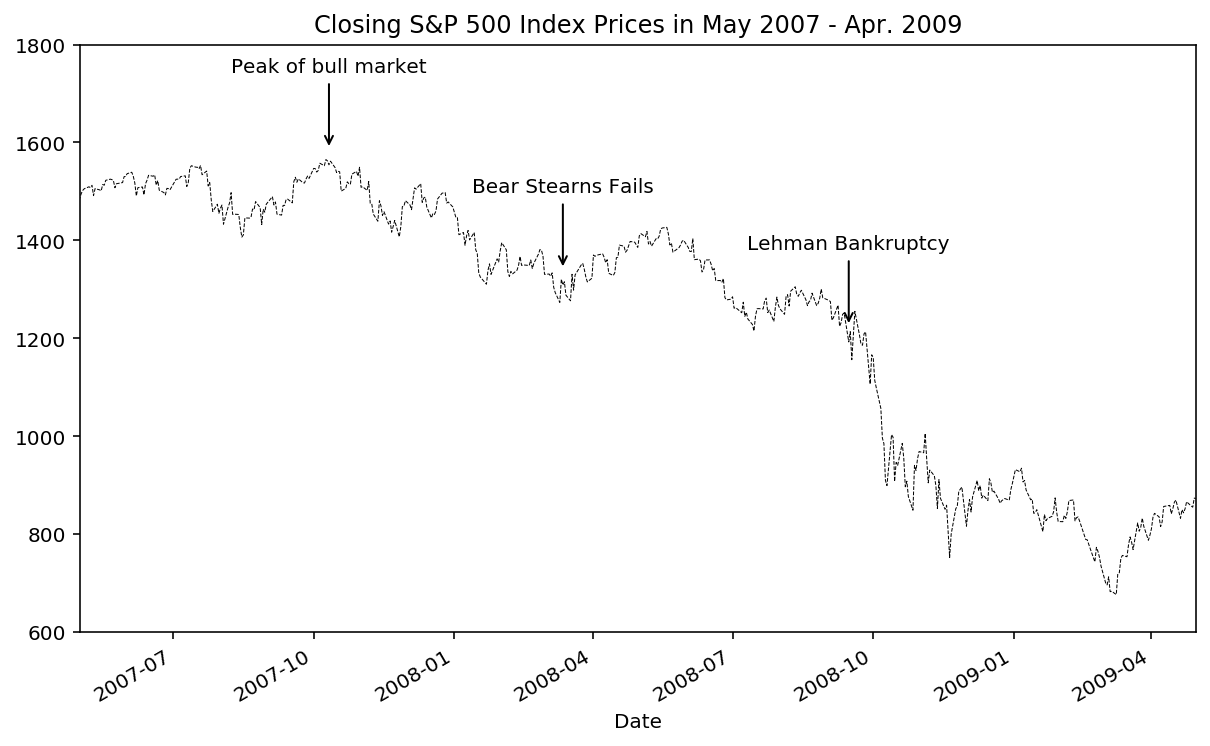

In [0]:
fig, ax = plt.subplots(1, 1, figsize=[10, 6])
spx.plot(ax=ax, style='k--', linewidth=0.5)
ax.set(xlim=['5/1/2007', '4/30/2009'], ylim=[600, 1800], title='Closing S&P 500 Index Prices in May 2007 - Apr. 2009')

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 30), xytext=(date, spx.asof(date) + 220), 
    arrowprops=dict(arrowstyle='->'), horizontalalignment='center', verticalalignment='top')
    
plt.show()    

### 1.5.5 Shapes (Optional)

We can also add shapes, referred to as *patches*, to a plot. The following creates several `patch` objects (available in [`matplotlib.patches`](https://matplotlib.org/api/patches_api.html)) and adds them to a subplot by calling [`add_patch()`](): 

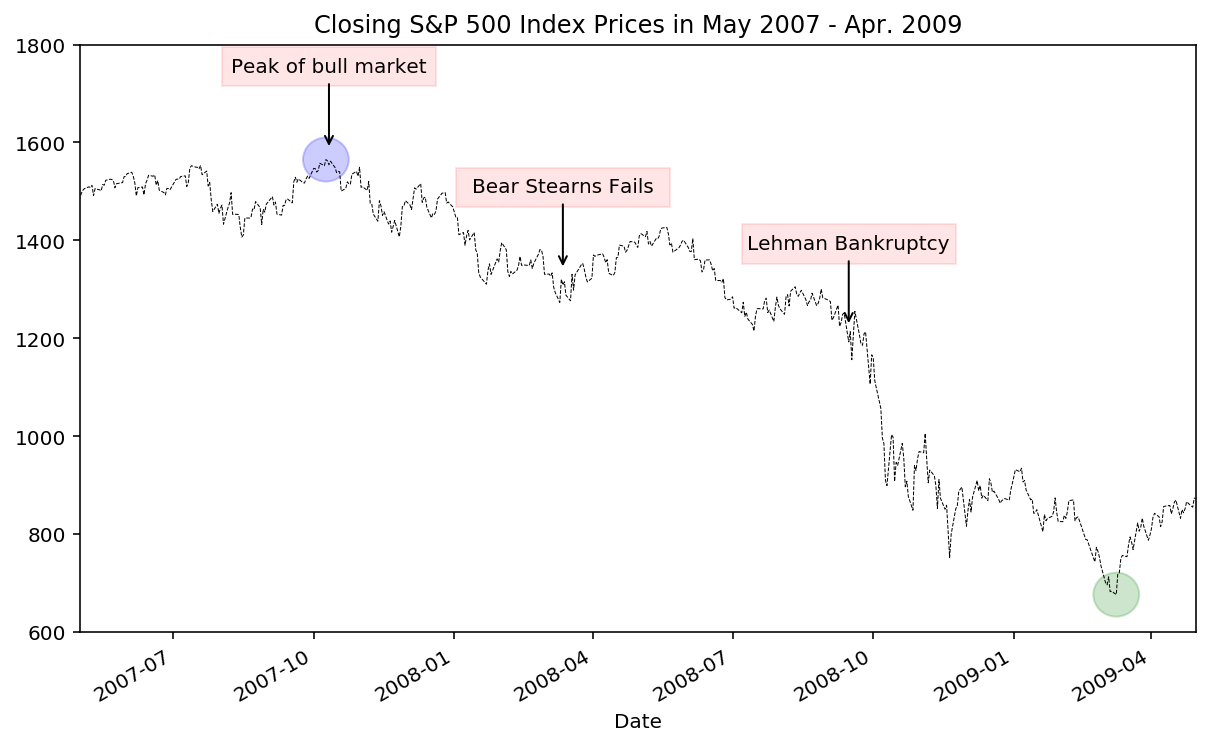

In [0]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(1, 1, figsize=[10, 6])
spx.plot(ax=ax, style='k--', linewidth=0.5)
ax.set(xlim=['5/1/2007', '4/30/2009'], ylim=[600, 1800], title='Closing S&P 500 Index Prices in May 2007 - Apr. 2009')

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 30), xytext=(date, spx.asof(date) + 220), 
    arrowprops=dict(arrowstyle='->'), horizontalalignment='center', verticalalignment='top')
    ax.add_patch(mpatches.Rectangle((date-timedelta(70), spx.asof(date) + 160), timedelta(140), 80, color='r', alpha=0.1))
       
ax.add_patch(mpatches.Ellipse((spx.idxmax(), spx[spx.idxmax()]), 30, 30, color='b', alpha=0.2))    
ax.add_patch(mpatches.Ellipse((spx.idxmin(), spx[spx.idxmin()]), 30, 90, color='g', alpha=0.2))

plt.show()  


### 1.5.6 Stylesheets (Optional)

Matplotlib has a very convenient `style` module, which includes a number of default stylesheets, as well as the ability to create and package our own styles. 

In [0]:
plt.style.available  # list the available styles

['fivethirtyeight',
 'seaborn-darkgrid',
 'seaborn-white',
 'seaborn-dark',
 '_classic_test',
 'seaborn-whitegrid',
 'seaborn-muted',
 'ggplot',
 'seaborn-talk',
 'seaborn-notebook',
 'seaborn',
 'seaborn-poster',
 'seaborn-colorblind',
 'seaborn-deep',
 'Solarize_Light2',
 'seaborn-ticks',
 'tableau-colorblind10',
 'seaborn-dark-palette',
 'seaborn-paper',
 'classic',
 'fast',
 'seaborn-bright',
 'grayscale',
 'bmh',
 'seaborn-pastel',
 'dark_background']

The basic way to switch to a stylesheet is to call `plt.style.use('stylename')`. This will change the style for the rest of the session.


<div class='alert alert-info'>plt.rcParams.update(IPython_default) can be used to reset the runtime configuration to the notebook default.</div>
 


Alternatively, we can use the style context manager, which sets a style temporarily:

```
with plt.style.context('stylename'):
    statements to make a plot
```    

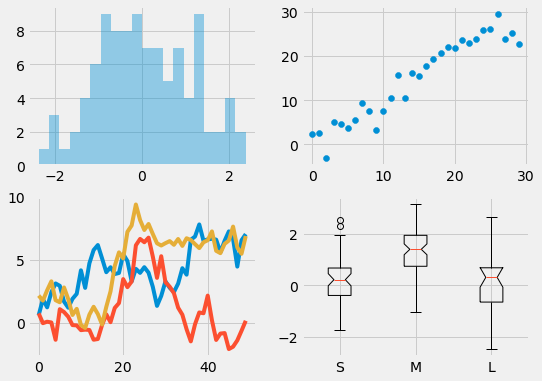

In [0]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(2, 2, figsize=(8, 6))
    ax[0, 0].hist(np.random.normal(size=100), bins=20, alpha=0.4)
    ax[0, 1].scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
    ax[1, 0].plot(np.random.normal(size=50).cumsum())
    ax[1, 0].plot(np.random.normal(size=50).cumsum())
    ax[1, 0].plot(np.random.normal(size=50).cumsum())
    ax[1, 1].boxplot([np.random.normal(0.5, size=50), np.random.normal(1.5, size=80), 
                      np.random.normal(0.3, size=30)], 
                     labels=['S', 'M', 'L'], notch = True)
    plt.show()


---

## 1.6 Saving Plots

The figure can be saved to a file using the `Figure`'s `savefig()` method. The file type is inferred from the file extension.

In [0]:
fig.savefig('price.png', dpi=400, bbox_inches='tight')

We can find the list of supported file types by using the figure `canvas` object's method:
 

In [0]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}


---

## 1.7 Scatter Plots and Histograms


[`plt.scatter()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)/[`Axes.scatter()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html) can create *scatter plots* where data can be mapped to more aesthetic properties of each point (size, face color, edge color, etc.) to illustrate multidimensional data:

In [0]:
inspect.signature(plt.scatter)

<Signature (x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)>

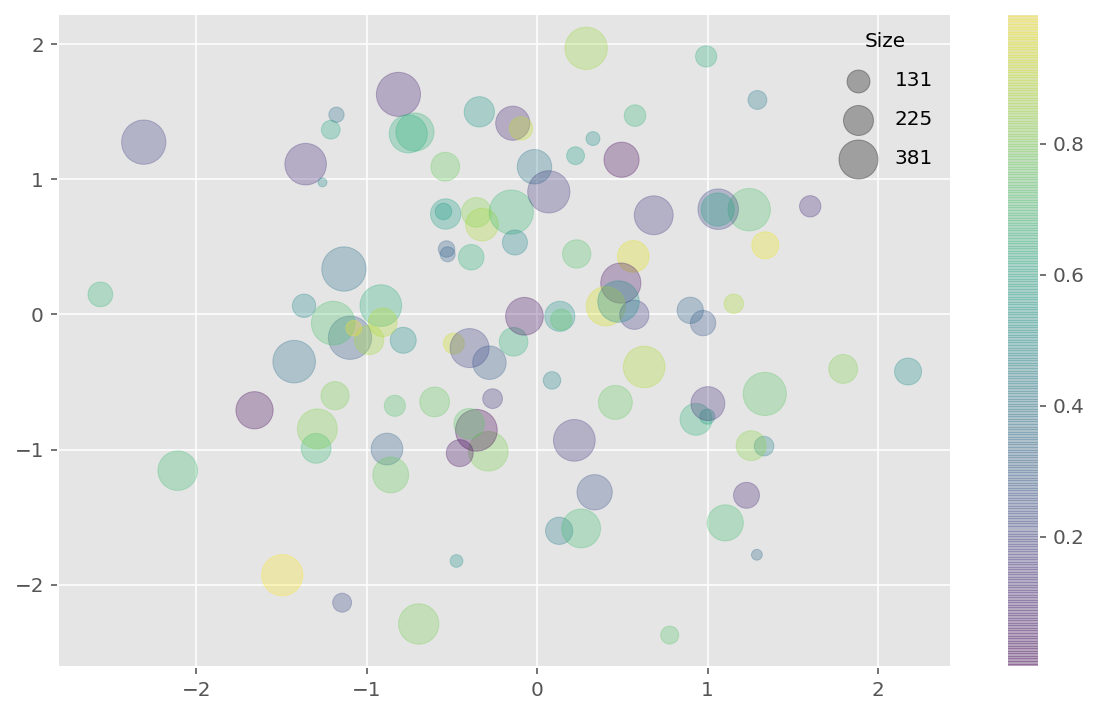

In [0]:
x, y = np.random.normal(size=(2, 100))
color, size = np.random.uniform(size=(2, 100))
 
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(1, 1, figsize=[10, 6])
    plt.scatter(x, y, c=color, s=500*size, alpha=0.3, cmap='viridis')
    plt.colorbar() # show color scale

    for s in np.quantile(size, [0.25, 0.5, 0.75]):
        ax.scatter([], [], c='k', alpha=0.3, s=500*s, label=str(int(500*s)))
     
    ax.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Size')
    plt.show()

---

[`plt.hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html)/[`Axes.hist()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hist.html) can plot *histograms* where 1D continuous data is divided into bins to show its frequency or density distribution:



In [0]:
inspect.signature(mpl.axes.Axes.hist)

<Signature (self, x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)>

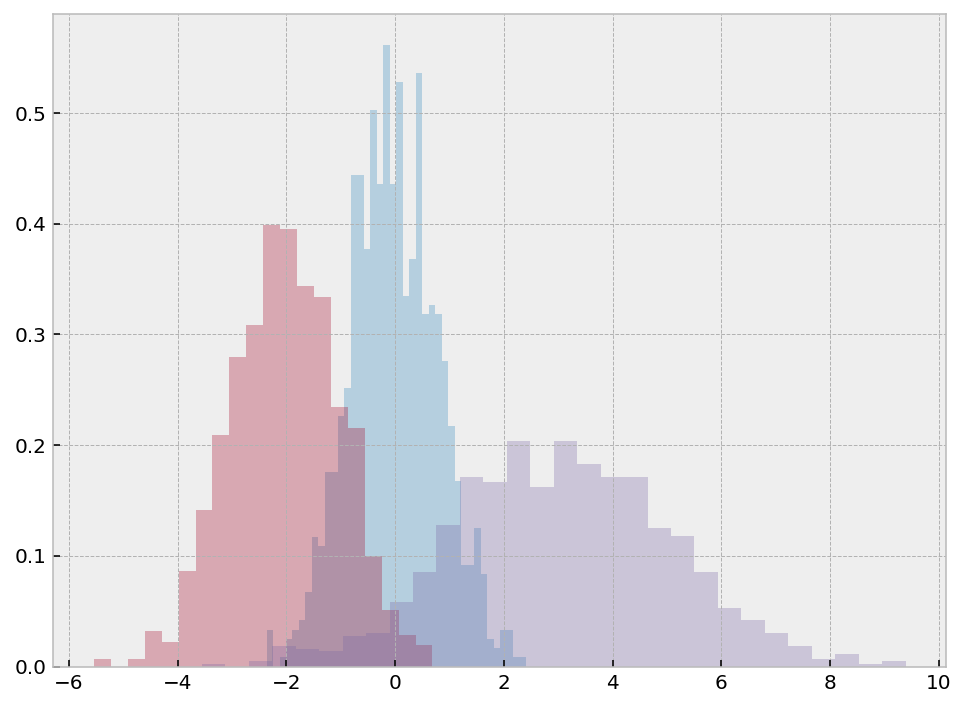

In [0]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000) 
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True)

with plt.style.context('bmh'): 
    fig, ax = plt.subplots(1, 1, figsize=[8, 6])
    ax.hist(x1, bins=40, **kwargs)
    ax.hist(x2, bins=20, **kwargs)
    ax.hist(x3, bins=30, **kwargs)
    plt.show()

---

## 1.8 3D Plotting (Optinal)

The [`mplot3d`](https://matplotlib.org/tutorials/toolkits/mplot3d.html) toolkit built on top of matplotlib's 2-dimensional display are availabile for 3-dimensional data visualization. Import it to use:


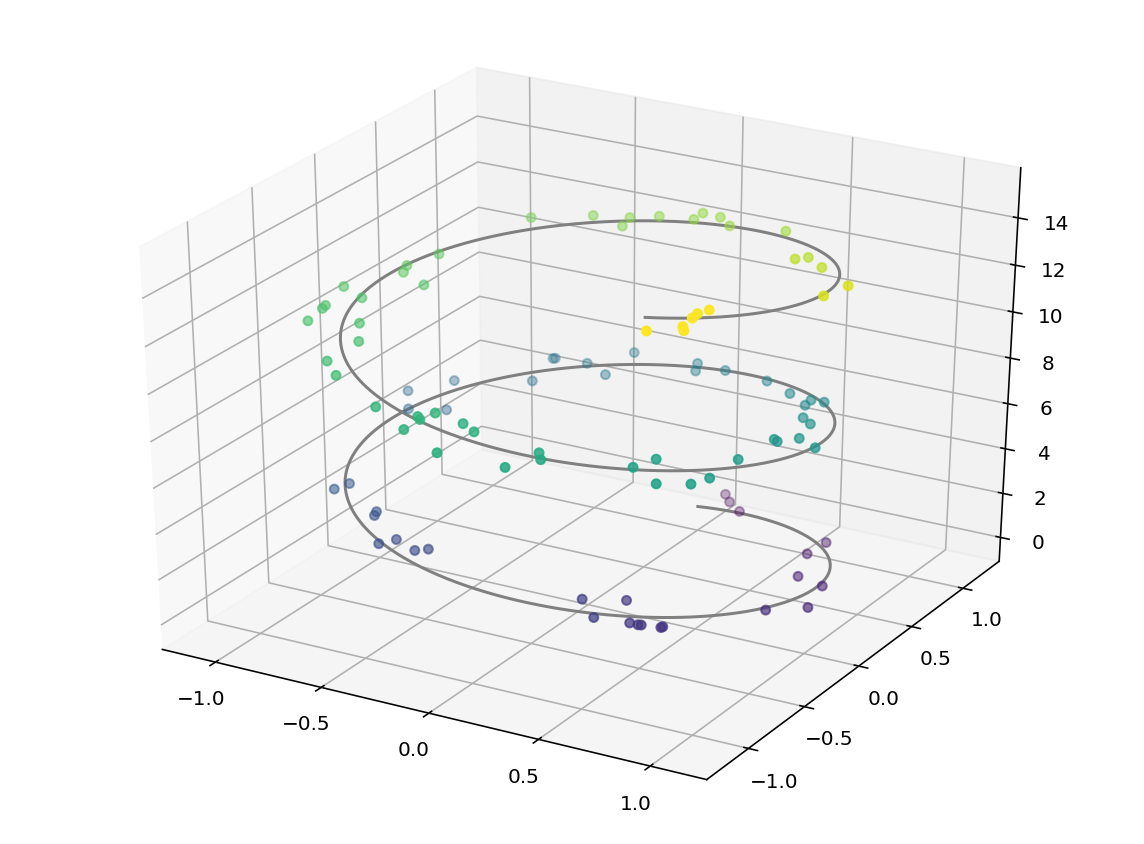

In [0]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10, 7.5))
ax = plt.axes(projection='3d')   # fig.add_subplot(111, projection='3d')
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline); yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
 
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

plt.show()

Sometimes it is useful to display 3-dimensional data by plotting a surface to fit data triplets `(x, y, z)` where `z` is interpreted as the height above the `xy`-plane and can be optionally color-coded: 

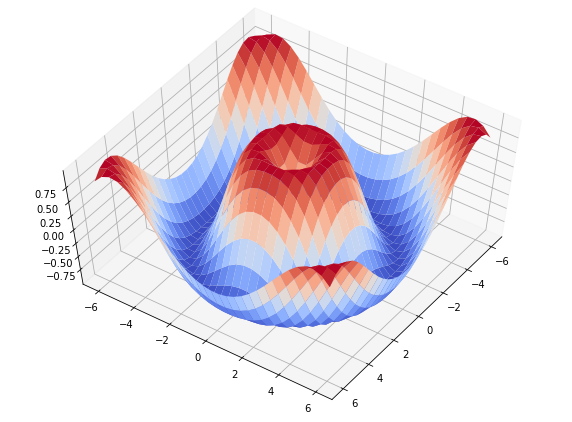

In [0]:
fig = plt.figure(figsize=(10, 7.5))
ax = plt.axes(projection='3d')

xline = np.linspace(-6, 6, 30)
yline = np.linspace(-6, 6, 30)
x, y = np.meshgrid(xline, yline) 
z = np.sin(np.sqrt(x ** 2 + y ** 2))

ax.plot_surface(x, y, z, cmap=mpl.cm.coolwarm)
ax.view_init(60, 35)

plt.show()

---

# 2 Data Visualization with Seaborn

Drawbacks with matplotlib:

- Its API is relatively low level. Doing sophisticated statistical visualization requires a lot of boilerplate code.

- It does not provide an integral support for pandas `DataFrame`.



In [0]:
x = np.linspace(0, 4, 50)
df_quadratic = pd.DataFrame({'x': x, 'y': x**2})
df_quadratic

,x,y
0,0.000000,0.000000
1,0.081633,0.006664
2,0.163265,0.026656
3,0.244898,0.059975
4,0.326531,0.106622
...,...,...
45,3.673469,13.494377
46,3.755102,14.100791
47,3.836735,14.720533
48,3.918367,15.353603


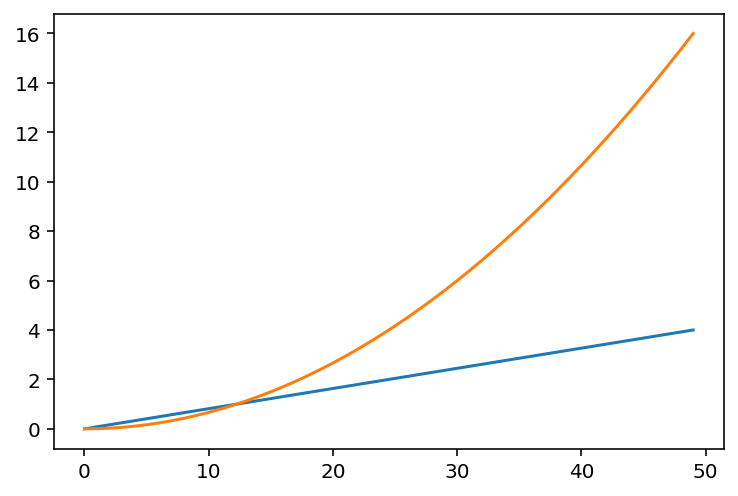

In [0]:
plt.plot(df_quadratic)

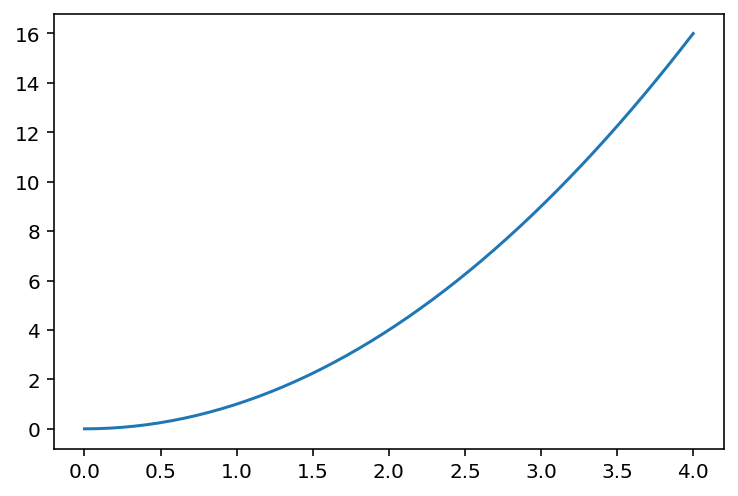

In [0]:
plt.plot(df_quadratic['x'], df_quadratic['y'])

This gives rise to the invention of the [seaborn](https://seaborn.pydata.org/) library, which is built on top of matplotlib. It adds to the matplotlib's functionality by:

  - defining simple high-level functions for common statistical plot types;
  
  - integrating with the functionality provided by pandas `DataFrame`.

In [0]:
import seaborn as sns

Behind the scenes, seaborn uses matplotlib to draw plots. Many tasks can be accomplished with only seaborn functions, but further customization might require using matplotlib directly.

---

To demo seaborn's high-level plotting routines, we use the [`load_dataset()`](https://seaborn.pydata.org/generated/seaborn.load_dataset.html) function to get quick access to an example dataset, the iris dataset:



In [0]:
iris = sns.load_dataset("iris"); iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica



<img alt="virginica_picture" src="https://drive.google.com/uc?id=1K2V1aNQ2noYkWfd0kAvuzPyt-VGEubu_" width=580> 



The [`pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function makes it easy to plot pairwise relationships for datasets of larger dimensions:


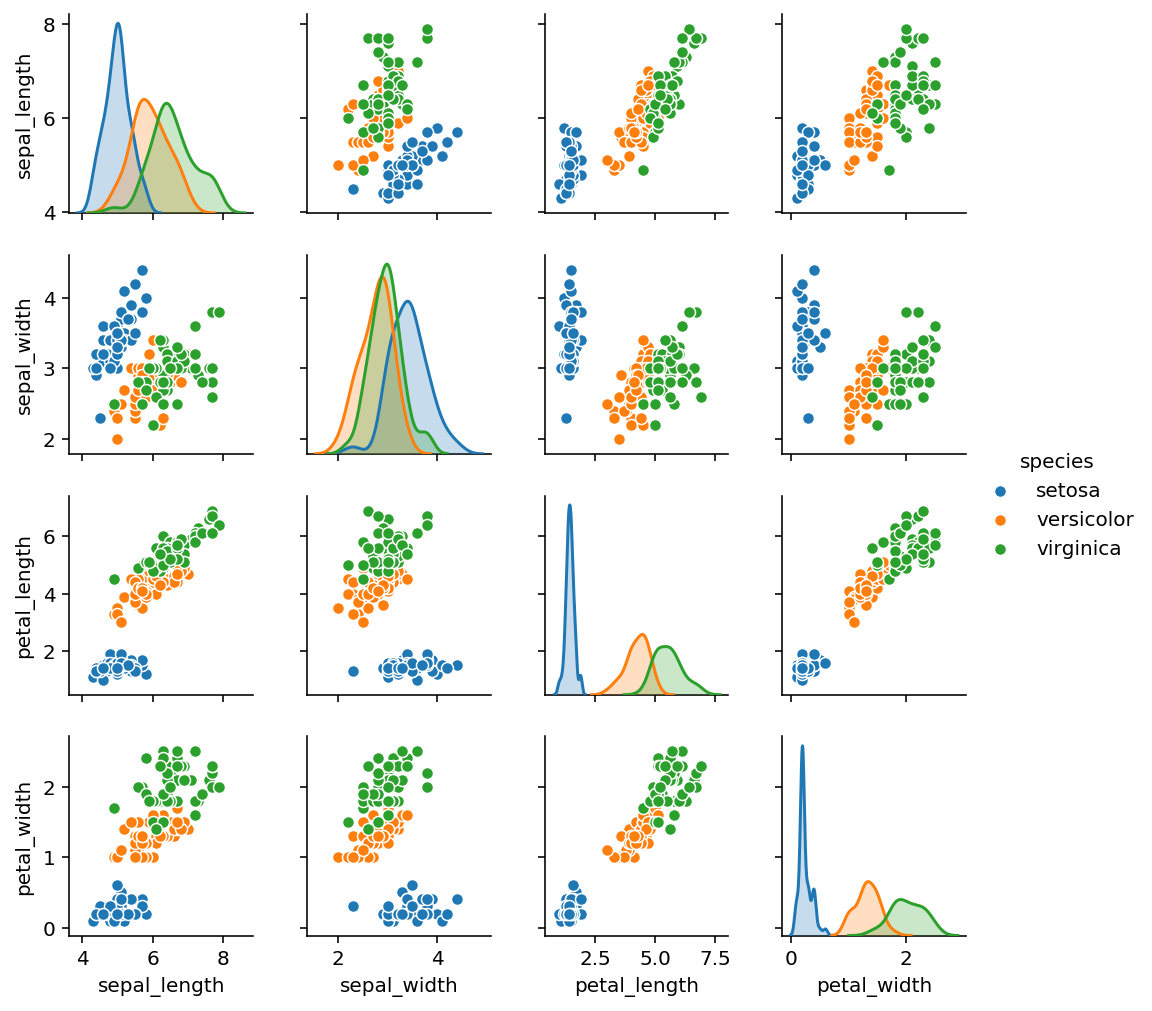

In [0]:
sns.pairplot(iris, hue='species', height=1.8)
plt.show()

We can use [`jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) to show the joint distribution between different variables, along with the associated marginal distributions:

In [0]:
inspect.signature(sns.jointplot)

<Signature (x, y, data=None, kind='scatter', stat_func=None, color=None, height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)>

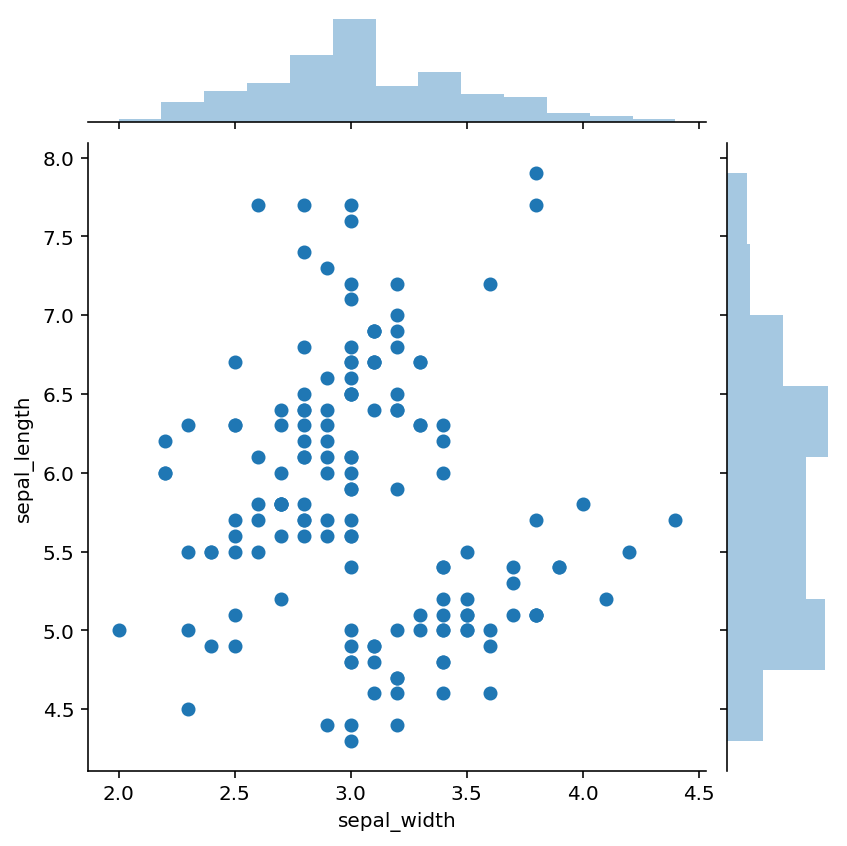

In [0]:
sns.jointplot("sepal_width", "sepal_length", data=iris)
plt.show()

The joint plot can even do some automatic kernel density estimation and regression:

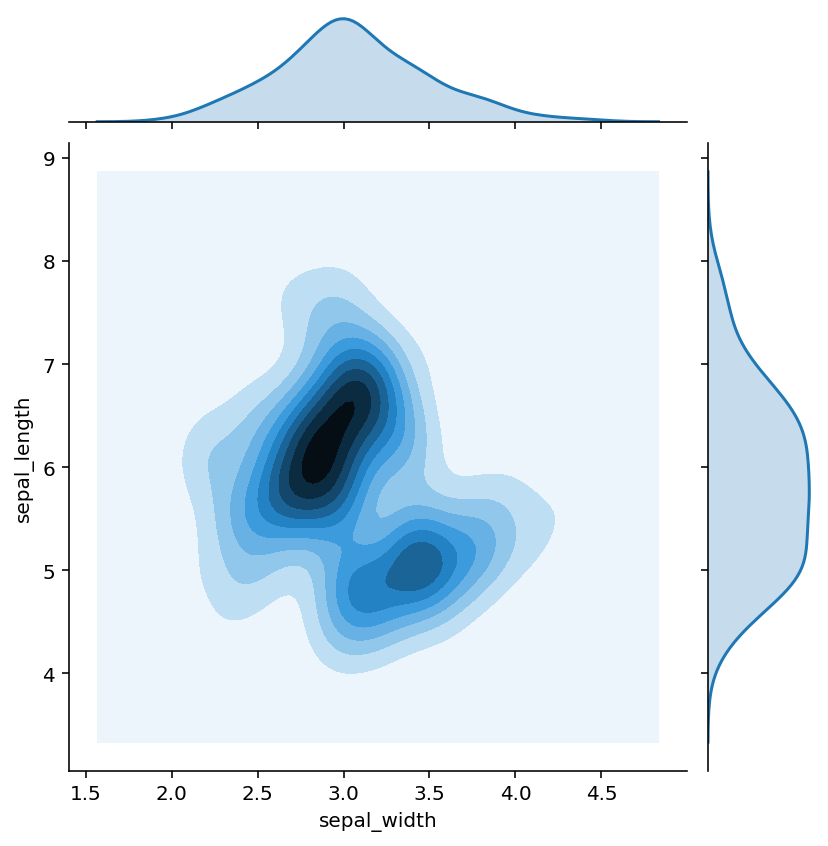

In [0]:
sns.jointplot("sepal_width", "sepal_length", 
              data=iris, kind="kde")
plt.show()

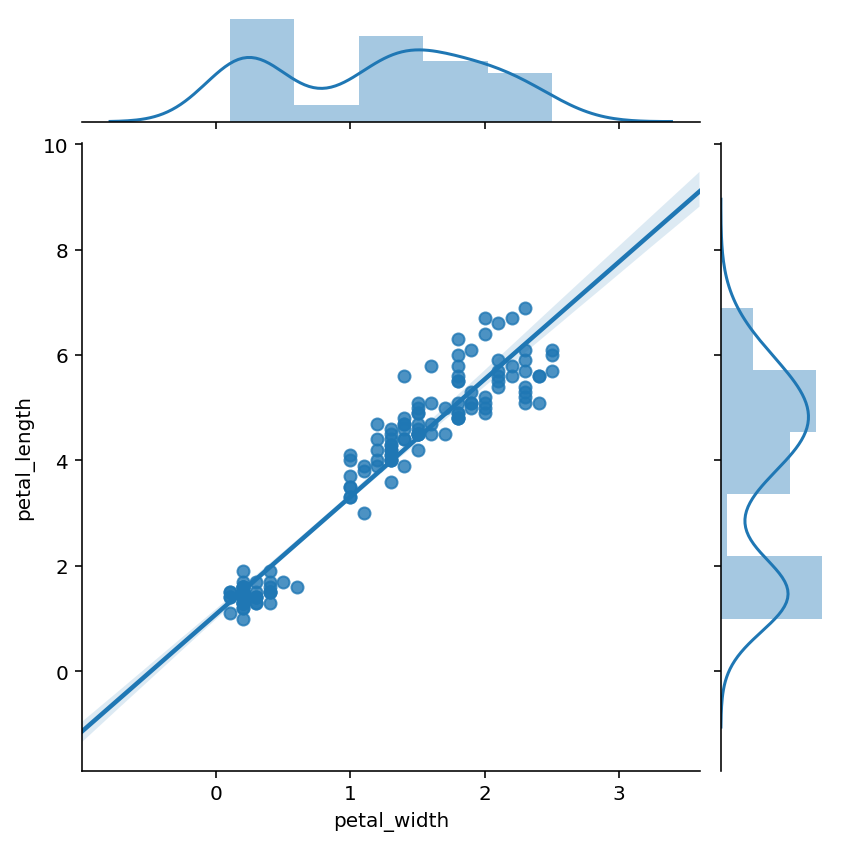

In [0]:
sns.jointplot("petal_width", "petal_length", 
              data=iris, kind="reg")
plt.show()

Seaborn's [`FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) makes visualizing subsets of data extremely simple.

- Faceted histograms:

In [0]:
# transform data to meet the requirements of the tools we're going to use

iris.index.name='id'; iris.reset_index(level=0, inplace=True)
iris_l = pd.melt(iris, id_vars=['id', 'species'], 
                 value_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
                 var_name='feature', value_name='value')
iris_l[['feature', 'subfeature']] = iris_l['feature'].str.split('_', expand=True); iris_l

,id,species,feature,value,subfeature
0,0,setosa,sepal,5.1,length
1,1,setosa,sepal,4.9,length
2,2,setosa,sepal,4.7,length
3,3,setosa,sepal,4.6,length
4,4,setosa,sepal,5.0,length
...,...,...,...,...,...
595,145,virginica,petal,2.3,width
596,146,virginica,petal,1.9,width
597,147,virginica,petal,2.0,width
598,148,virginica,petal,2.3,width


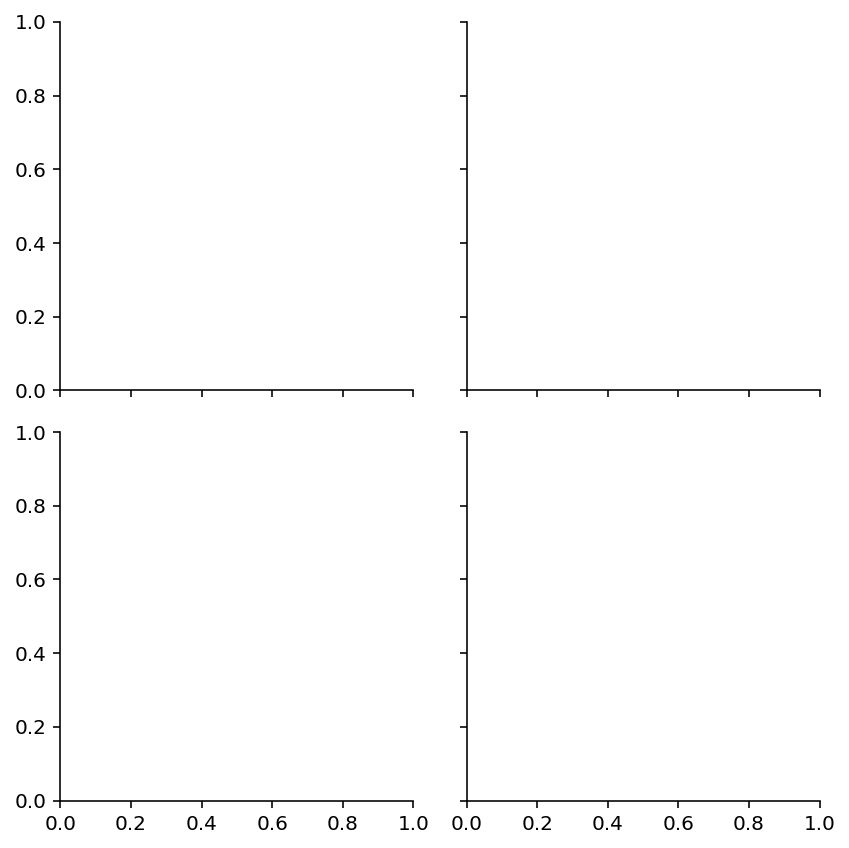

In [0]:
sns.FacetGrid(iris_l, row="feature", col="subfeature")

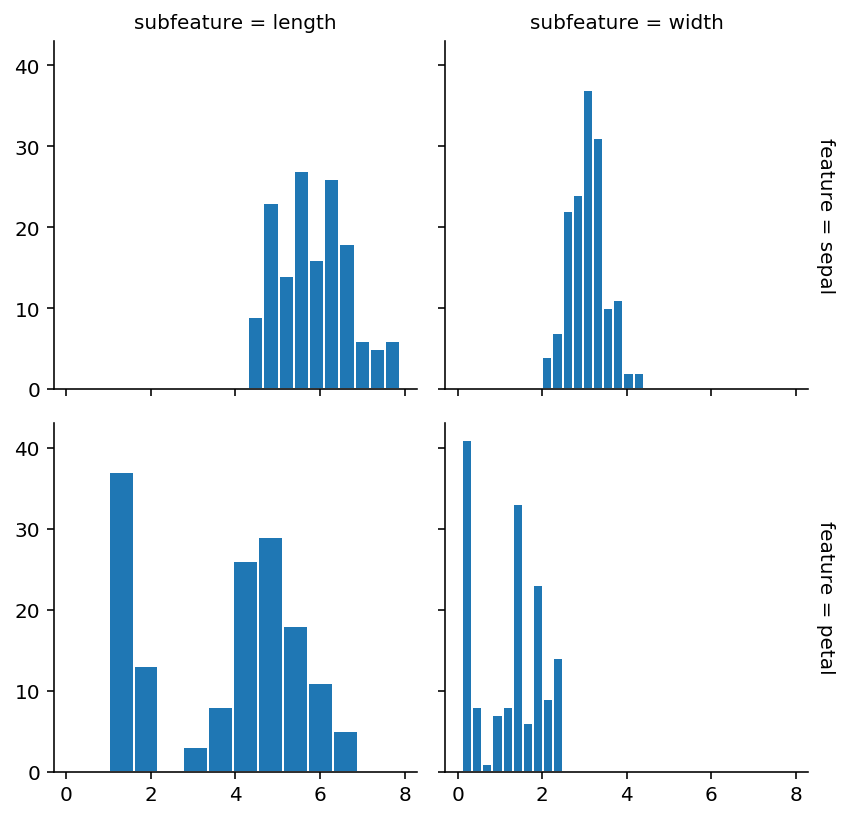

In [0]:
g1 = sns.FacetGrid(iris_l, row="feature", col="subfeature", margin_titles=True, height=3)  # try to include hue='species'
g1.map(plt.hist, "value", edgecolor='w').set_axis_labels('', '')
plt.show()

- Faceted scatterplots:

In [0]:
# transform data to meet the requirements of the tools we're going to use

iris_w = iris_l.pivot_table(values='value', index=['id', 'feature', 'species'], columns='subfeature')
iris_w.reset_index(inplace=True)
iris_w.columns.name = None; iris_w

,id,feature,species,length,width
0,0,petal,setosa,1.4,0.2
1,0,sepal,setosa,5.1,3.5
2,1,petal,setosa,1.4,0.2
3,1,sepal,setosa,4.9,3.0
4,2,petal,setosa,1.3,0.2
...,...,...,...,...,...
295,147,sepal,virginica,6.5,3.0
296,148,petal,virginica,5.4,2.3
297,148,sepal,virginica,6.2,3.4
298,149,petal,virginica,5.1,1.8


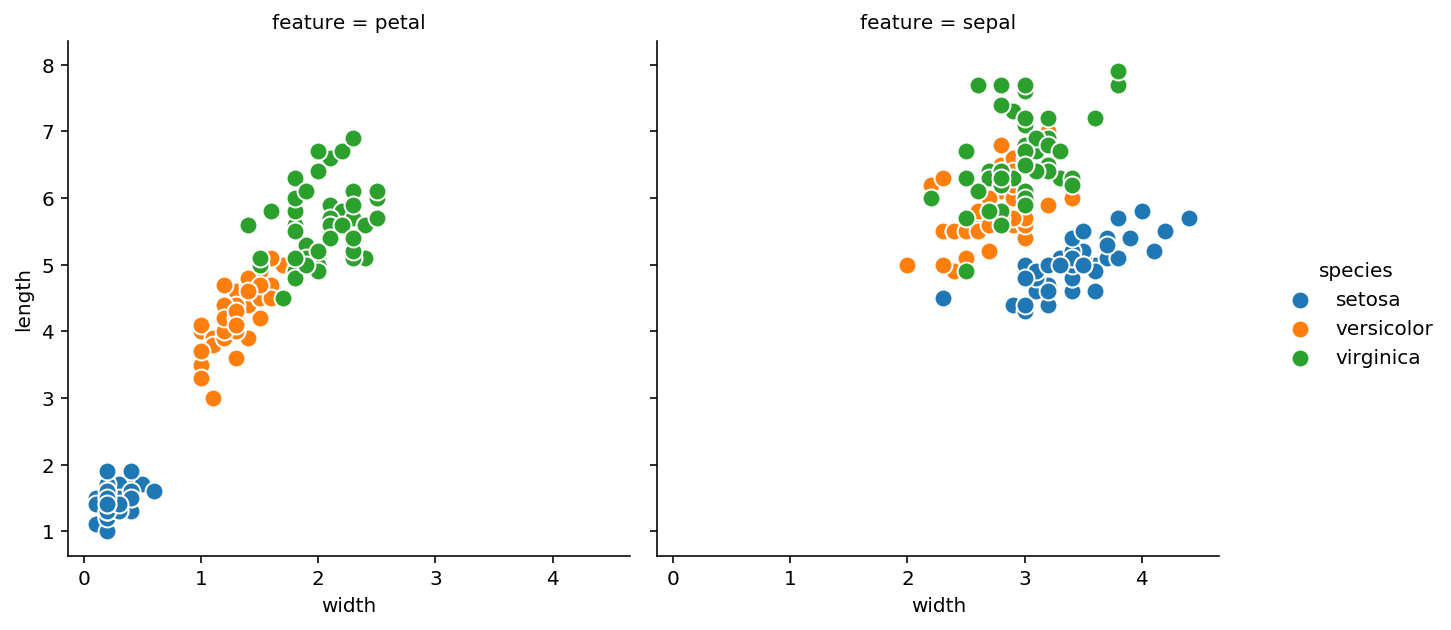

In [0]:
g2 = sns.FacetGrid(iris_w, col='feature', hue='species', margin_titles=True, height=4.5)
g2.map(plt.scatter, 'width', 'length', edgecolor='w', s=80).add_legend()  # or sns.scatterplot
plt.show()

Some interfaces, such as [`relplot`](https://seaborn.pydata.org/generated/seaborn.relplot.html) and [`catplot`](https://seaborn.pydata.org/generated/seaborn.catplot.html), are built on a `FacetGrid`, and allow us to add faceting variables easily:

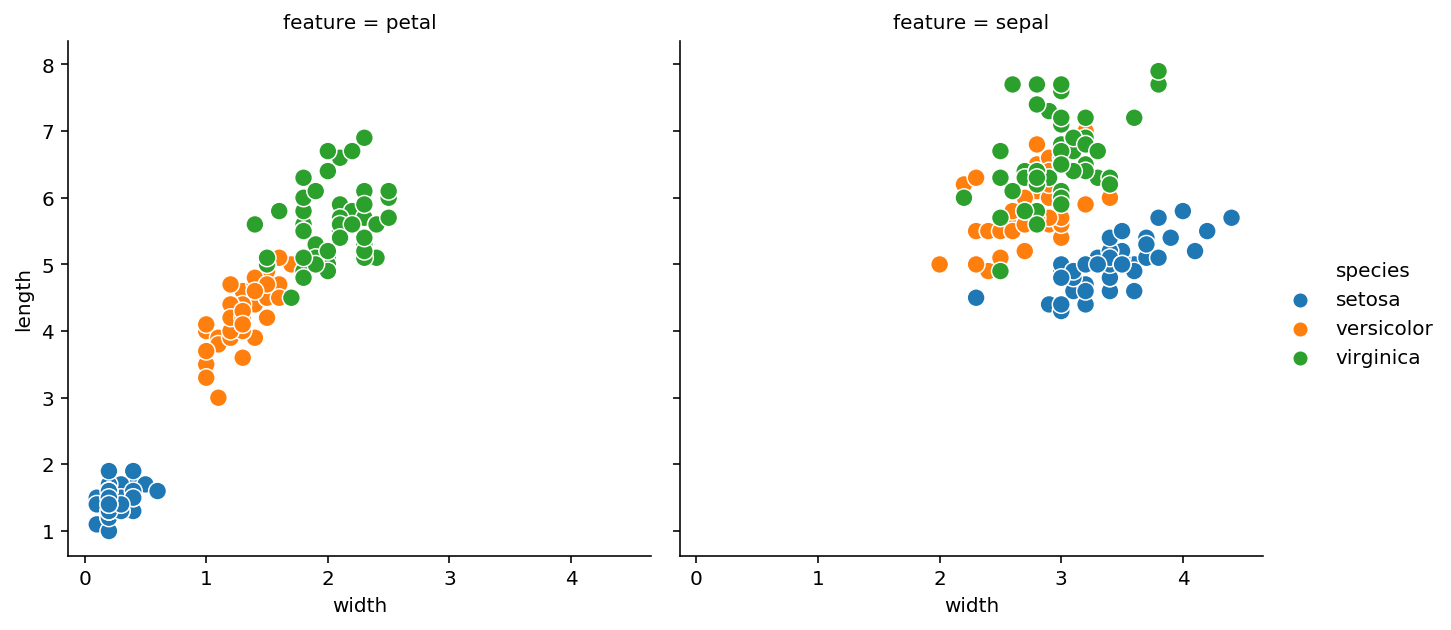

In [0]:
sns.relplot('width', 'length', hue='species', col="feature", s=80, data=iris_w, height=4.5)
plt.show()

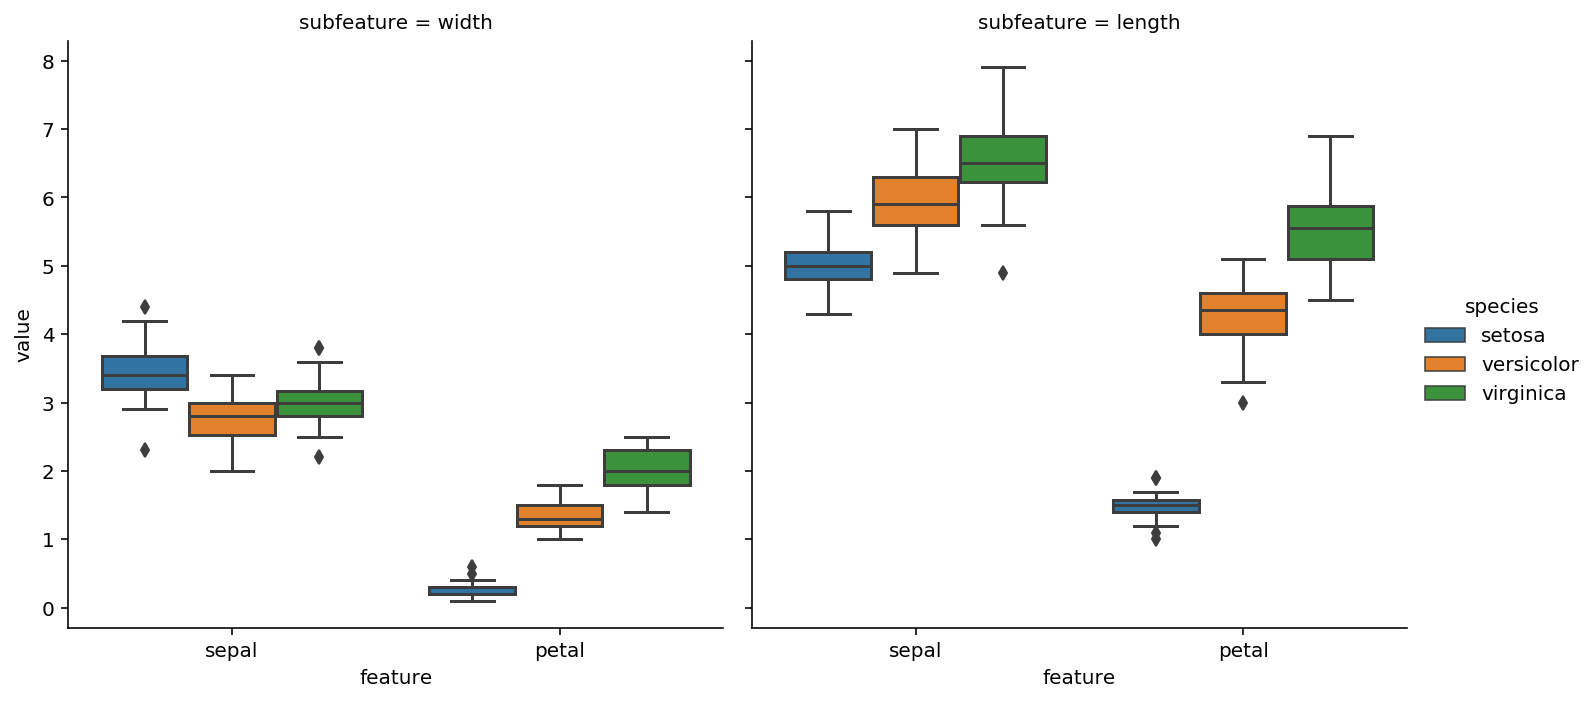

In [0]:
sns.catplot("feature", "value", hue="species", col="subfeature", col_order=["width", "length"], kind="box",
            data=iris_l)
plt.show()